<a href="https://colab.research.google.com/github/Amaljayaranga/Constrastive-Loss-Experiments/blob/master/CL_EMNIST_BALANCED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:45: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:168: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result eith

Epoch :  1 Batch :  0 loss :  0.007113363593816757
Epoch :  1 Batch :  100 loss :  0.005147311836481094
Epoch :  1 Batch :  200 loss :  0.005416145082563162
Epoch :  1 Batch :  300 loss :  0.005830659065395594
Epoch :  1 Batch :  400 loss :  0.005275378003716469
Epoch :  1 Batch :  500 loss :  0.005009742453694344
Epoch :  1 Batch :  600 loss :  0.005324465688318014
Epoch :  1 Batch :  700 loss :  0.005520456470549107
Epoch :  1 Batch :  800 loss :  0.005895751528441906
Epoch :  1 Batch :  900 loss :  0.005610187537968159
Epoch :  1 Batch :  1000 loss :  0.005551345180720091
Epoch :  1 Batch :  1100 loss :  0.005724350456148386
Epoch :  1 Batch :  1200 loss :  0.005500383209437132
Epoch :  1 Batch :  1300 loss :  0.005135980434715748
Epoch :  1 Batch :  1400 loss :  0.00507406797260046
Epoch 1 loss  0.0055905958162026205


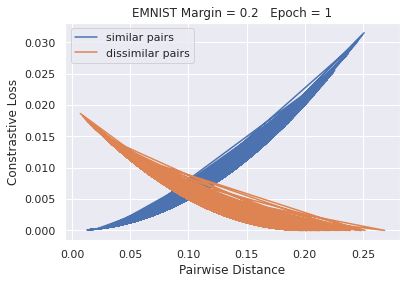

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:168: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:169: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:174: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a diff

Epoch :  2 Batch :  0 loss :  0.004865114577114582
Epoch :  2 Batch :  100 loss :  0.00546272611245513
Epoch :  2 Batch :  200 loss :  0.005604572594165802
Epoch :  2 Batch :  300 loss :  0.0047590769827365875
Epoch :  2 Batch :  400 loss :  0.004901321139186621
Epoch :  2 Batch :  500 loss :  0.00538040092214942
Epoch :  2 Batch :  600 loss :  0.0058282813988626
Epoch :  2 Batch :  700 loss :  0.0059873382560908794
Epoch :  2 Batch :  800 loss :  0.0052729276940226555
Epoch :  2 Batch :  900 loss :  0.0053889136761426926
Epoch :  2 Batch :  1000 loss :  0.005219135899096727
Epoch :  2 Batch :  1100 loss :  0.005737085361033678
Epoch :  2 Batch :  1200 loss :  0.005318366456776857
Epoch :  2 Batch :  1300 loss :  0.005426306743174791
Epoch :  2 Batch :  1400 loss :  0.006118099670857191
Epoch 2 loss  0.0054961725694609555


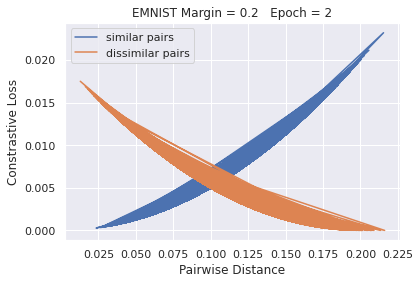

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type SimaseNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [3]:
import torch.nn.functional as F
import torch
from torchvision.datasets import EMNIST
from torchvision import transforms
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
import torch.optim as optim
import numpy as np
from torch.utils.data.sampler import SubsetRandomSampler
from argparse import ArgumentParser
import seaborn as sns; sns.set()
import torch.nn  as nn
from PIL import Image


parser = ArgumentParser(description='Simase Network ')
parser.add_argument('--learning_batch_size', type=int, default=64)
parser.add_argument('--constractive_loss_margin', type=float, default=0.2)
parser.add_argument('--learning_rate', type=float, default=1e-3)
parser.add_argument('--num_epochs', type=int, default=2)
parser.add_argument('--weight_decay', type=float, default=1e-5)
parser.add_argument('--validation_split', type=float, default=0.2)
parser.add_argument('--mode', type=str, default='train')
parser.add_argument('--device', type=str, default='cuda')


args, unknown = parser.parse_known_args()

DEVICE = args.device
if not torch.cuda.is_available():
    DEVICE = 'cpu'


import torch.nn as nn

class SimaseNet(nn.Module):

    def __init__(self):
        super(SimaseNet,self).__init__()

        self.conv = nn.Sequential(nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5),
                                  nn.ReLU(),
                                  nn.MaxPool2d(kernel_size=2, stride=2),
                                  nn.Conv2d(in_channels=32,out_channels=64, kernel_size=5),
                                  nn.ReLU(),
                                  nn.MaxPool2d(kernel_size=2, stride=2)
                                  )
        #output 64,4,4

        self.fc = nn. Sequential(nn.Linear(64*4*4,256),
                                 nn.ReLU(),
                                 nn.Linear(256,256),
                                 nn.ReLU(),
                                 nn.Linear(256,16)
                                 )

    def forward_once(self, x):
        x = self.conv(x)
        x = x.view(x.size()[0], -1)
        x = self.fc(x)
        return x

    def forward(self, in1, in2):
        out1 = self.forward_once(in1)
        out2 = self.forward_once(in2)
        return out1, out2



class SiameseEMNIST(Dataset):

    def __init__(self, mnist_dataset):
        self.mnist_dataset = mnist_dataset
        self.train = self.mnist_dataset.train
        self.transform = self.mnist_dataset.transform

        if self.train:
            self.train_labels = self.mnist_dataset.train_labels
            self.train_data = self.mnist_dataset.train_data
            self.labels_set = set(self.train_labels.numpy())
            self.label_to_indices = {label: np.where(self.train_labels.numpy() == label)[0]
                                     for label in self.labels_set}

        else:
            self.test_labels = self.mnist_dataset.test_labels
            self.test_data = self.mnist_dataset.test_data
            self.labels_set = set(self.test_labels.numpy())
            self.label_to_indices = {label: np.where(self.test_labels.numpy() == label)[0]
                                     for label in self.labels_set}

            random_state = np.random.RandomState(29)


            positive_pairs = [[i,
                               random_state.choice(self.label_to_indices[self.test_labels[i].item()]),
                               0]
                              for i in range(0, len(self.test_data), 2)]
            #print(positive_pairs)

            negative_pairs = [[i,
                               random_state.choice(self.label_to_indices[
                                                       np.random.choice(
                                                           list(self.labels_set - set([self.test_labels[i].item()]))
                                                       )
                                                   ]),
                               1]
                              for i in range(1, len(self.test_data), 2)]
            self.test_pairs = positive_pairs + negative_pairs


    def __len__(self):
        return len(self.mnist_dataset)

    def __getitem__(self, index):

        if self.train:
            target = np.random.randint(0, 2) #0,1
            img1, label1 = self.train_data[index], self.train_labels[index].item()
            if target == 1: #similar ones
                siamese_index = index
                while siamese_index == index:
                        siamese_index = np.random.choice(self.label_to_indices[label1])  # Random


            else:
                siamese_label = np.random.choice(list(self.labels_set - set([label1])))
                siamese_index = np.random.choice(self.label_to_indices[siamese_label])
            img2 = self.train_data[siamese_index]

        else:
            img1 = self.test_data[self.test_pairs[index][0]]
            img2 = self.test_data[self.test_pairs[index][1]]
            target = self.test_pairs[index][2]

        img1 = Image.fromarray(img1.numpy())
        img2 = Image.fromarray(img2.numpy())

        if self.transform is not None:
            img1 = self.transform(img1)
            img2 = self.transform(img2)

        return img1, img2, target



pwd_similiar = np.array([])
loss_similar = np.array([])

pwd_dis = np.array([])
loss_dis = np.array([])

class ContrastiveLoss(nn.Module):

    def __init__(self, margin):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin


    def forward(self, output, target):

  
        eq_distance = F.pairwise_distance(output[0], output[1]) 
        np_target = target.numpy()
        np_distance = eq_distance.detach().numpy()
       
        global pwd_similiar, pwd_dis, loss_similar, loss_dis

        pwd_similiar = np.append(pwd_similiar, (np_distance[[np.where(np_target == 0)]]))
        pwd_dis = np.append(pwd_dis, (np_distance[[np.where(np_target == 1)]]))

        loss = 0.5 * (1 - target.float()) * torch.pow(eq_distance, 2) + \
               0.5 * target.float() * torch.pow(torch.clamp(self.margin - eq_distance, min=0.00), 2)
        np_loss = loss.detach().numpy()

        loss_similar = np.append(loss_similar, (np_loss[[np.where(np_target == 0)]]))
        loss_dis = np.append(loss_dis, (np_loss[[np.where(np_target == 1)]]))

        #print('shape ', ' similar distances', len(pwd_similiar),len(loss_similar))
        #print('shape ', ' dis distances', len(pwd_dis), len(loss_dis))

        return loss.mean()
       

def draw_plot(epoch):
    global pwd_similiar, pwd_dis,loss_similar,loss_dis
    plt.plot(pwd_similiar, loss_similar, label="similar pairs")
    plt.plot(pwd_dis, loss_dis, label="dissimilar pairs")
    plt.xlabel('Pairwise Distance')
    plt.ylabel('Constrastive Loss')
    title = "EMNIST Margin = {}   Epoch = {}".format(args.constractive_loss_margin,epoch)
    plt.title(title)
    plt.legend()
    plt.show()

    pwd_similiar = np.array([])
    loss_similar = np.array([])
    pwd_dis = np.array([])
    loss_dis = np.array([])


train_dataset = EMNIST('../data/EMNIST', train=True, download=True,split='balanced',
                             transform = transforms.Compose([
                                 transforms.ToTensor()
                             ]))

test_dataset = EMNIST('../data/EMNIST', train=False, download=True,split='balanced',
                            transform = transforms.Compose([
                                transforms.ToTensor()
                            ]))

siamese_train_dataset = SiameseEMNIST(train_dataset)
split = int(np.floor(args.validation_split * len(siamese_train_dataset)))
indices = list(range(len(siamese_train_dataset)))
train_indices, val_indices = indices[split:], indices[:split]
train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(val_indices)

siamese_train_loader = torch.utils.data.DataLoader(siamese_train_dataset, batch_size = args.learning_batch_size,
                                                   sampler=train_sampler)
siamese_val_loader = torch.utils.data.DataLoader(siamese_train_dataset, batch_size = args.learning_batch_size,
                                                  sampler=valid_sampler)

simase_test_dataset = SiameseEMNIST(test_dataset)
siamese_test_loader = torch.utils.data.DataLoader(simase_test_dataset, batch_size = 1, shuffle=True)


model = SimaseNet()
model = model.to(DEVICE)
criterion = ContrastiveLoss(margin=args.constractive_loss_margin)
optimizer = optim.Adam(model.parameters(), lr=args.learning_rate, weight_decay=args.weight_decay)

train = True

if train:
    # training
    model.train()
    losses = []
    chunk = 100

    for epoch in range(1, args.num_epochs+1):

        for batch_idx, batch in enumerate(siamese_train_loader):

            img1, img2, target = batch
            img1 = img1.to(DEVICE)
            img2 = img2.to(DEVICE)
            optimizer.zero_grad()
            out1, out2 = model(img1, img2)
            out = [out1.cpu(), out2.cpu()]
            loss = criterion(out, target)
            loss.backward()
            optimizer.step()

            if batch_idx % chunk == 0:
              print("Epoch : ", epoch, "Batch : " , batch_idx, "loss : ", loss.item())
            losses.append(loss.item())

        print("Epoch", epoch, "loss ", np.mean(losses))
        draw_plot(epoch)

    torch.save(model, 'simase.pth')

if not train:

        model = torch.load('simase.pth')
        model.eval()

        lss = []
        lds = []

        for batch_idx, data in enumerate(siamese_test_loader):
            img1, img2, target = data
            out1, out2 = model(img1, img2)
            eq = F.pairwise_distance(out1,out2)
            print(eq)

            #same =0
            if target == 0 :
                loss = criterion(out1, out2, target)
                print('loss',loss)
                lss.append(loss)
            else:
                loss = criterion(out1, out2, target)
                lds.append(loss)






